In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [5]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [6]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('D:\Downloads\82373_191501_bundle_archive','train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [7]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [10]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")



Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 73s 2ms/step - loss: 2.1178 - accuracy: 0.4550 - val_loss: 0.6842 - val_accuracy: 0.8249
Epoch 2/15
31367/31367 [==============================] - 77s 2ms/step - loss: 0.8884 - accuracy: 0.7331 - val_loss: 0.3677 - val_accuracy: 0.8944
Epoch 3/15
31367/31367 [==============================] - 79s 3ms/step - loss: 0.6296 - accuracy: 0.8036 - val_loss: 0.2776 - val_accuracy: 0.9178
Epoch 4/15
31367/31367 [==============================] - 77s 2ms/step - loss: 0.5503 - accuracy: 0.8300 - val_loss: 0.2520 - val_accuracy: 0.9322
Epoch 5/15
31367/31367 [==============================] - 79s 3ms/step - loss: 0.4747 - accuracy: 0.8558 - val_loss: 0.2296 - val_accuracy: 0.9356
Epoch 6/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.4443 - accuracy: 0.8646 - val_loss: 0.1768 - val_accuracy: 0.9467
Epoch 7/15
31367/31367 [==============================] - 73s 2ms/st

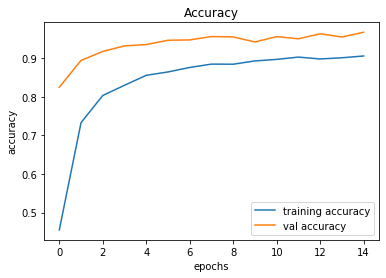

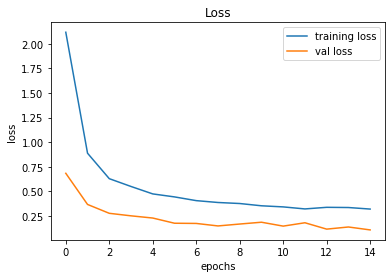

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [36]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('D:\Downloads\82373_191501_bundle_archive\Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
print(imgs[:10])



['Test/00000.png' 'Test/00001.png' 'Test/00002.png' 'Test/00003.png'
 'Test/00004.png' 'Test/00005.png' 'Test/00006.png' 'Test/00007.png'
 'Test/00008.png' 'Test/00009.png']


In [37]:
for img in imgs:
    image = Image.open("D:\Downloads\82373_191501_bundle_archive/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

In [39]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')


0.9263657957244655


Make the GUI with Tkinter  GUI toolkit 

In [40]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()


Veh > 3.5 tons prohibited
Keep right
Road work


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-40-d2ffc628c50c>", line 71, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-40-d2ffc628c50c>", line 66, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 268, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 1441, in predict
    x, _, _ = self._standardize_user_data(x)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 579, in _standardize_user_data
    exception_prefix='input')
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training_utils.py", line 145,

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-40-d2ffc628c50c>", line 71, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-40-d2ffc628c50c>", line 66, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 268, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 1441, in predict
    x, _, _ = self._standardize_user_data(x)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 579, in _standardize_user_data
    exception_prefix='input')
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training_utils.py", line 145,

Stop


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-40-d2ffc628c50c>", line 71, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-40-d2ffc628c50c>", line 66, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 268, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 1441, in predict
    x, _, _ = self._standardize_user_data(x)
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py", line 579, in _standardize_user_data
    exception_prefix='input')
  File "C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training_utils.py", line 145,

Speed limit (80km/h)
Speed limit (80km/h)
Keep right
Speed limit (80km/h)
